In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Importing the Dependencies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

##Data Collection and Data Processing

In [ ]:
banknote_data = pd.read_csv('/content/drive/MyDrive/Project/data_banknote_authentication.csv')
banknote_data.columns = ['variance', 'asymmetry', 'kurtosis', 'entropy', 'authentication']

In [ ]:
banknote_data.head()

,variance,asymmetry,kurtosis,entropy,authentication
0,4.54590,8.1674,-2.4586,-1.46210,0
1,3.86600,-2.6383,1.9242,0.10645,0
2,3.45660,9.5228,-4.0112,-3.59440,0
3,0.32924,-4.4552,4.5718,-0.98880,0
4,4.36840,9.6718,-3.9606,-3.16250,0


In [42]:
banknote_data.tail()

,variance,asymmetry,kurtosis,entropy,authentication
1366,0.40614,1.34920,-1.4501,-0.55949,1
1367,-1.38870,-4.87730,6.4774,0.34179,1
1368,-3.75030,-13.45860,17.5932,-2.77710,1
1369,-3.56370,-8.38270,12.3930,-1.28230,1
1370,-2.54190,-0.65804,2.6842,1.19520,1


In [43]:
banknote_data.shape

(1347, 5)

In [ ]:
banknote_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371 entries, 0 to 1370
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   variance        1371 non-null   float64
 1   asymmetry       1371 non-null   float64
 2   kurtosis        1371 non-null   float64
 3   entropy         1371 non-null   float64
 4   authentication  1371 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [ ]:
banknote_data.describe()

,variance,asymmetry,kurtosis,entropy,authentication
count,1371.000000,1371.000000,1371.000000,1371.000000,1371.000000
mean,0.431410,1.917434,1.400694,-1.192200,0.444931
std,2.842494,5.868359,4.310105,2.101683,0.497139
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.774700,-1.711300,-1.553350,-2.417000,0.000000
50%,0.495710,2.313400,0.616630,-0.586650,0.000000
75%,2.814650,6.813100,3.181600,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [44]:
banknote_data.columns

Index(['variance', 'asymmetry', 'kurtosis', 'entropy', 'authentication'], dtype='object')

##Data Cleaning, Removing Null Values and Removing Duplicates

In [ ]:
banknote_data.isnull().sum()

,0
variance,0
asymmetry,0
kurtosis,0
entropy,0
authentication,0


In [ ]:
banknote_data.drop_duplicates(inplace=True)
banknote_data.shape

(1347, 5)

##One Hot Encoding

In [ ]:
numerical_cols = ['variance', 'asymmetry', 'kurtosis', 'entropy']

Q1 = banknote_data[numerical_cols].quantile(0.25)
Q3 = banknote_data[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

outlier_removed_data = banknote_data[~((banknote_data[numerical_cols] < (Q1 - 1.5 * IQR)) | (banknote_data[numerical_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

outlier_removed_data.shape

(1258, 5)

##Standardization

In [ ]:
X = outlier_removed_data.drop('authentication', axis=1)
Y = outlier_removed_data['authentication']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

feature_names = X.columns
X_scaled = pd.DataFrame(X_scaled, columns=feature_names, index=X.index)

X_scaled.head()

,variance,asymmetry,kurtosis,entropy
0,1.412546,1.112068,-0.935469,-0.243186
1,1.159769,-0.921273,0.279584,0.580915
2,1.007561,1.367118,-1.365900,-1.363475
3,-0.155142,-1.263165,1.013584,0.005481
4,1.346554,1.395156,-1.351872,-1.136559


##Displaying Target Values Distribution

Text(0.5, 0, 'Conterfeit')

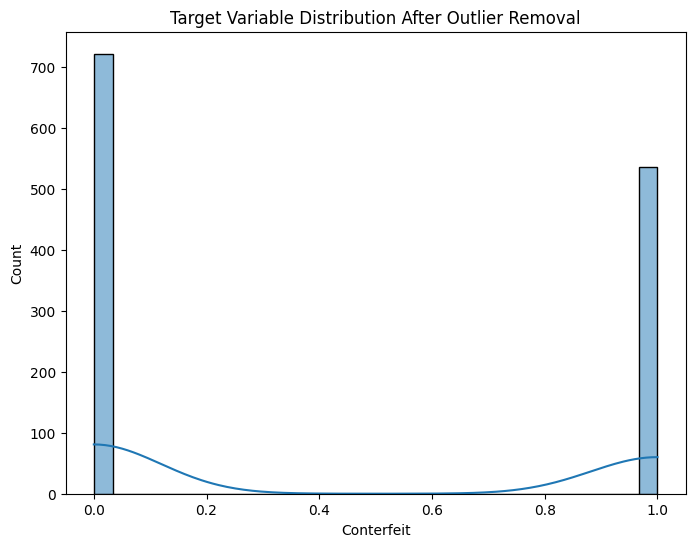

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(Y, bins=30, kde=True)
plt.title('Target Variable Distribution After Outlier Removal')
plt.xlabel('Conterfeit')

##Resampling to make Distributions Equal

In [ ]:
smote = SMOTE(random_state=42)
X_resampled, Y_resampled = smote.fit_resample(X_scaled, Y)

In [ ]:
data_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(Y_resampled, columns=['authentication'])], axis=1)
data_resampled.head()

,variance,asymmetry,kurtosis,entropy,authentication
0,1.412546,1.112068,-0.935469,-0.243186,0
1,1.159769,-0.921273,0.279584,0.580915,0
2,1.007561,1.367118,-1.365900,-1.363475,0
3,-0.155142,-1.263165,1.013584,0.005481,0
4,1.346554,1.395156,-1.351872,-1.136559,0


##Splitting Data

In [ ]:
X = data_resampled.drop("authentication", axis=1)
Y = data_resampled['authentication']

##Checking the Target Distribution after Resampling

Text(0.5, 0, 'Conterfeit')

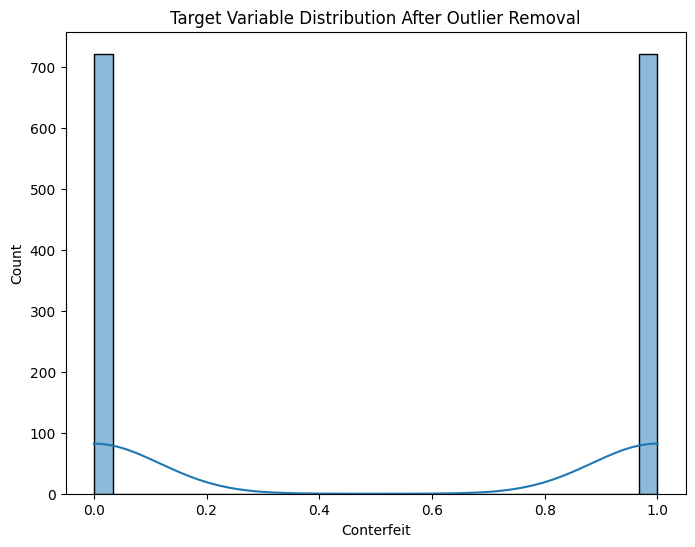

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(Y, bins=30, kde=True)
plt.title('Target Variable Distribution After Outlier Removal')
plt.xlabel('Conterfeit')

##Splitting Data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, stratify=Y, random_state=42)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(1444, 4) (1299, 4) (145, 4)


##Training Model

In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

##Evaluating Accuracy

In [ ]:
print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("Classification Report:\n", classification_report(Y_test, Y_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))

Accuracy: 0.9793103448275862
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98        73
           1       0.96      1.00      0.98        72

    accuracy                           0.98       145
   macro avg       0.98      0.98      0.98       145
weighted avg       0.98      0.98      0.98       145

Confusion Matrix:
 [[70  3]
 [ 0 72]]
